# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print(f"Shape of the Data :{df.shape}")

Shape of the Data :(9994, 13)


In [5]:
#Drop Duplicates Rows
df.drop_duplicates(inplace=True)

In [6]:
print(f"Updated Shape :{df.shape}")

Updated Shape :(9977, 13)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


There is no null values

In [138]:
# To check no of unique values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Exploratory Data Analysis


# Univariate Analysis

In [8]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

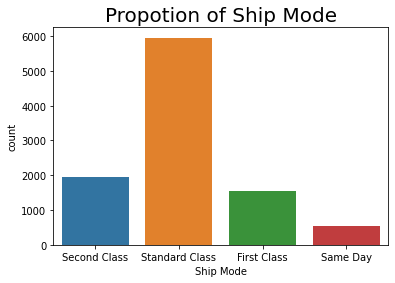

In [9]:
plt.title("Propotion of Ship Mode",fontsize=20)
sns.countplot(df['Ship Mode']);

In [10]:
Segment = df['Segment'].value_counts()
Segment

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

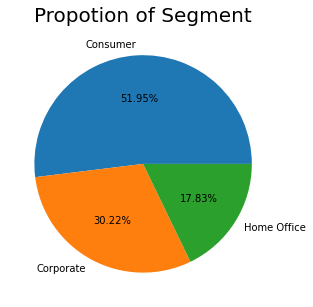

In [11]:
plt.figure(figsize=(10,5))
plt.title('Propotion of Segment',fontsize=20)
plt.pie(Segment,labels=Segment.keys(),autopct='%.2f%%');

In [12]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

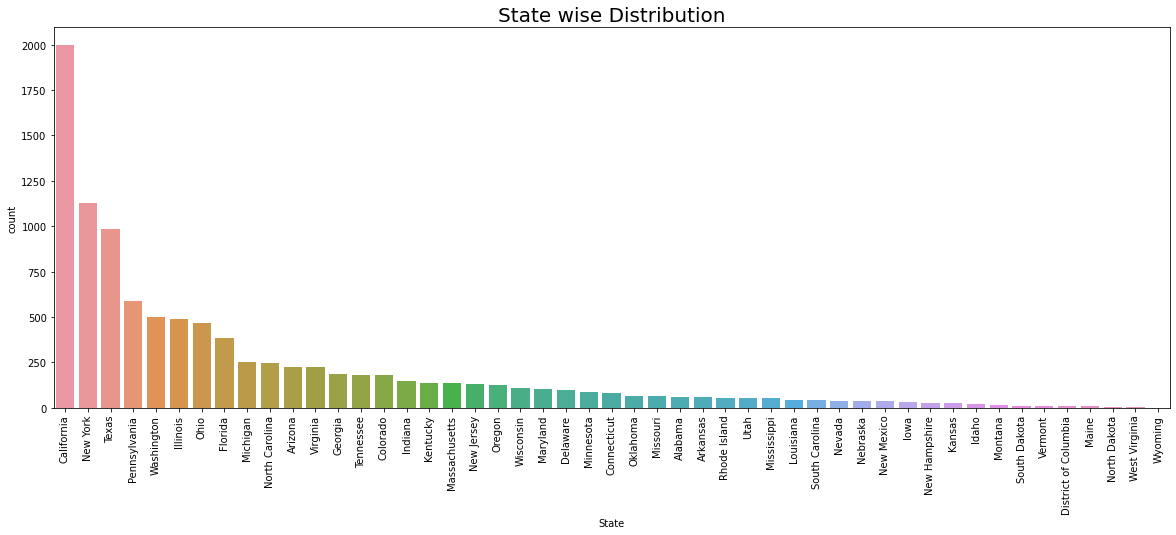

In [15]:
plt.figure(figsize=(20,7))
plt.title('State wise Distribution',fontsize=20);
plt.xticks(rotation=90)
sns.countplot(df['State'],order=df['State'].value_counts().index);

In [16]:
Region = df['Region'].value_counts()
Region

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

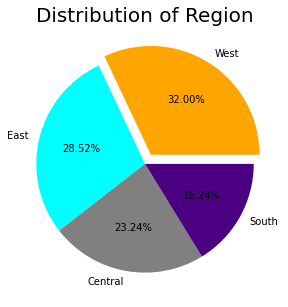

In [17]:
# Creating color parameters
colors = ( "orange", "cyan","grey", "indigo")

# Creating explode data
explode = (0.1, 0.0, 0.0, 0.0)

plt.figure(figsize=(10,5));
plt.title('Distribution of Region',fontsize=20);
plt.pie(Region,labels=Region.keys(),autopct='%.2f%%',colors=colors,explode=explode);

In [18]:
Category = df['Category'].value_counts()
Category

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

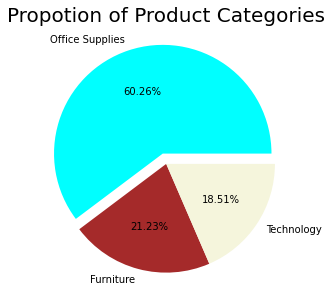

In [19]:
# Creating color parameters
colors = ( "cyan", "brown","beige")

# Creating explode data
explode = (0.1, 0.0, 0.0)
 
plt.figure(figsize=(10,5))
plt.title('Propotion of Product Categories',fontsize=20)
plt.pie(Category,labels=Category.keys(),autopct='%.2f%%',colors=colors,explode=explode);

In [20]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

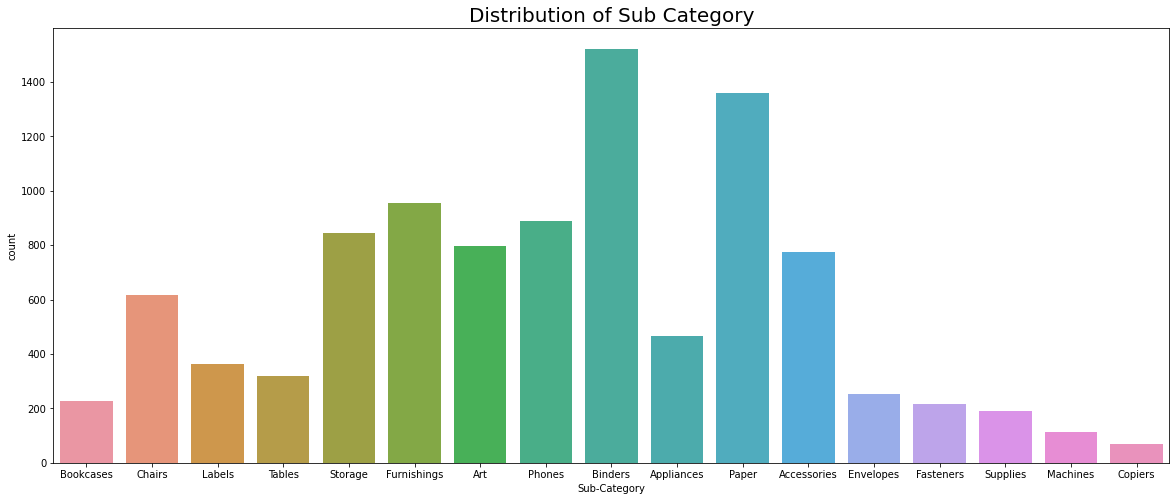

In [21]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Sub Category',fontsize=20)
sns.countplot(df['Sub-Category']);

# 

# B-Variate Analysis

In [22]:
shipmode_sigment = df.groupby('Ship Mode')['Segment'].value_counts()
shipmode_sigment

Ship Mode       Segment    
First Class     Consumer        768
                Corporate       485
                Home Office     284
Same Day        Consumer        317
                Corporate       114
                Home Office     111
Second Class    Consumer       1019
                Corporate       608
                Home Office     316
Standard Class  Consumer       3079
                Corporate      1808
                Home Office    1068
Name: Segment, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

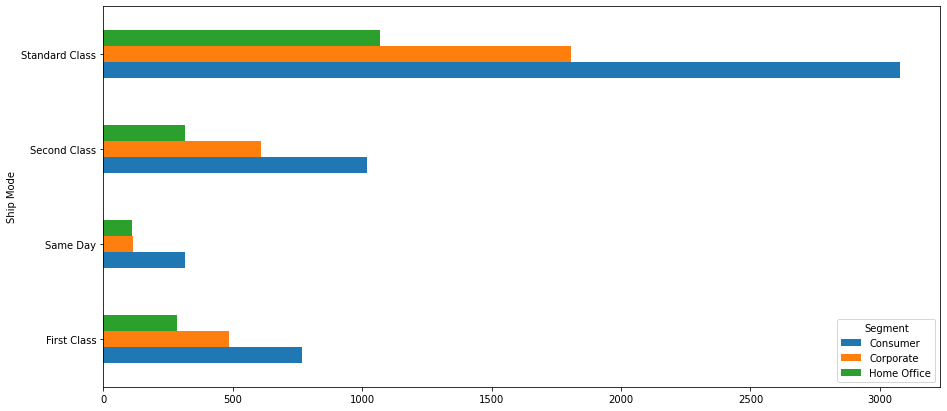

In [23]:
pd.crosstab(df['Ship Mode'],df['Segment']).plot(kind='barh',figsize=(15,7))

In [24]:
df.groupby('Category')['Sub-Category'].value_counts()

Category         Sub-Category
Furniture        Furnishings      956
                 Chairs           615
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1522
                 Paper           1359
                 Storage          846
                 Art              795
                 Appliances       466
                 Labels           363
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: Sub-Category, dtype: int64

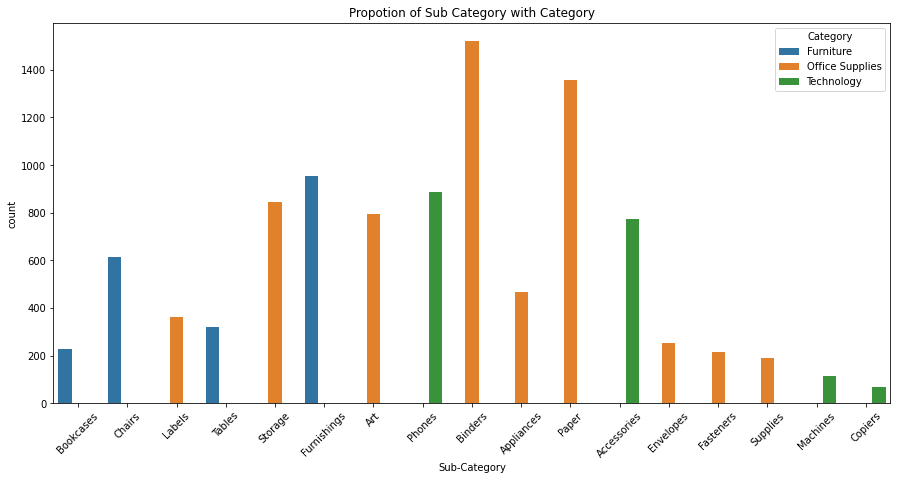

In [25]:
plt.figure(figsize=(15,7))
plt.title("Propotion of Sub Category with Category")
plt.xticks(rotation=45)
sns.countplot('Sub-Category',hue='Category',data=df);

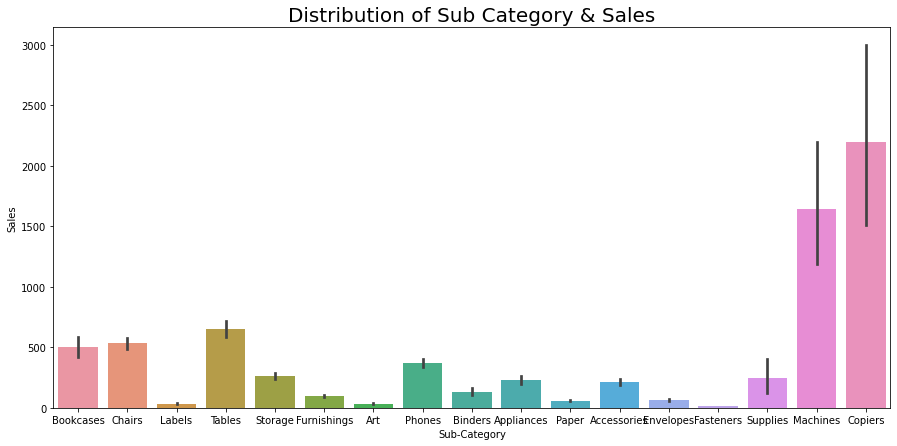

In [32]:
plt.figure(figsize=(15,7))
plt.title("Distribution of Sub Category & Sales",fontsize=20)
sns.barplot(df['Sub-Category'],df['Sales']);

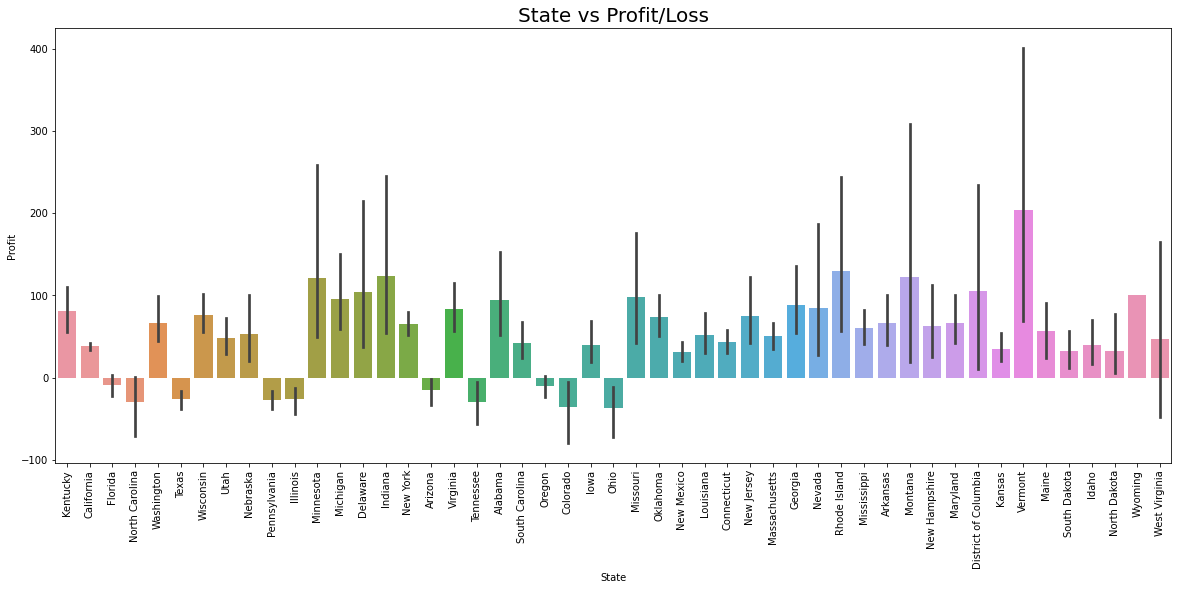

In [98]:
plt.figure(figsize=(20,8))
plt.title('State vs Profit/Loss',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(df['State'],df['Profit']);

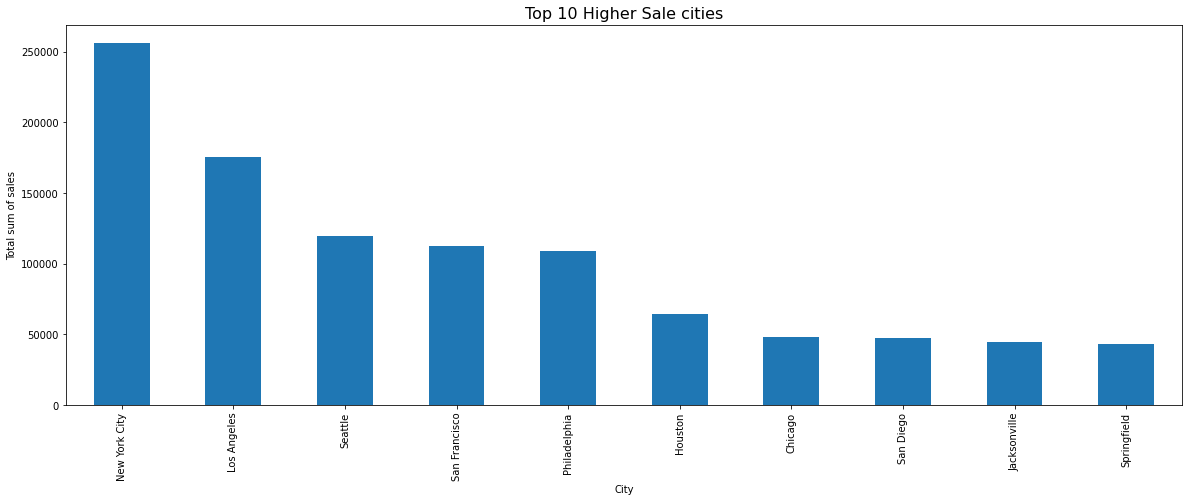

In [56]:
plt.title("Top 10 Higher Sale cities",fontsize=16)
plt.ylabel('Total sum of sales')
df.groupby('City')['Sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(20,7));

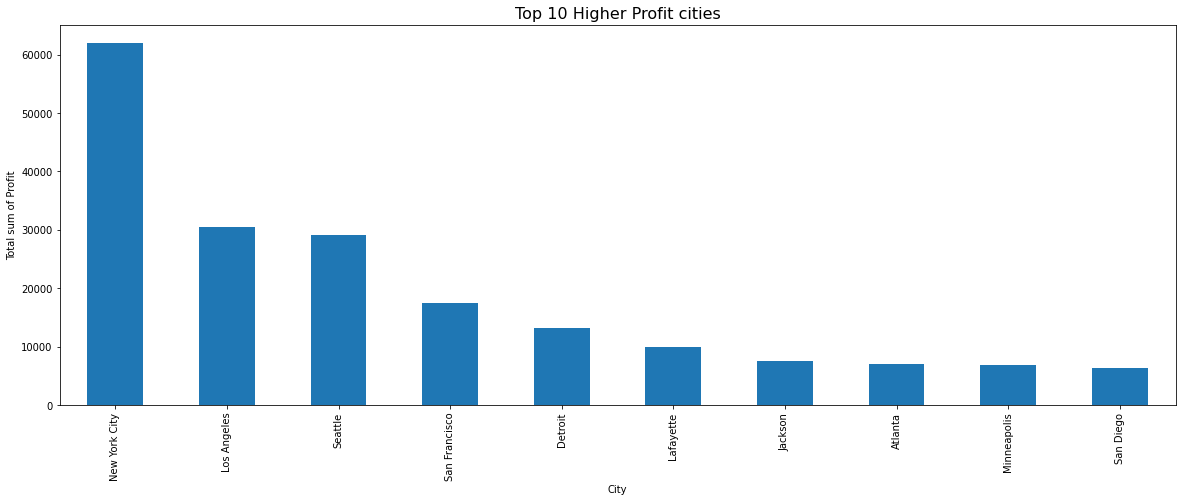

In [57]:
plt.title("Top 10 Higher Profit cities",fontsize=16)
plt.ylabel('Total sum of Profit')
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(20,7));

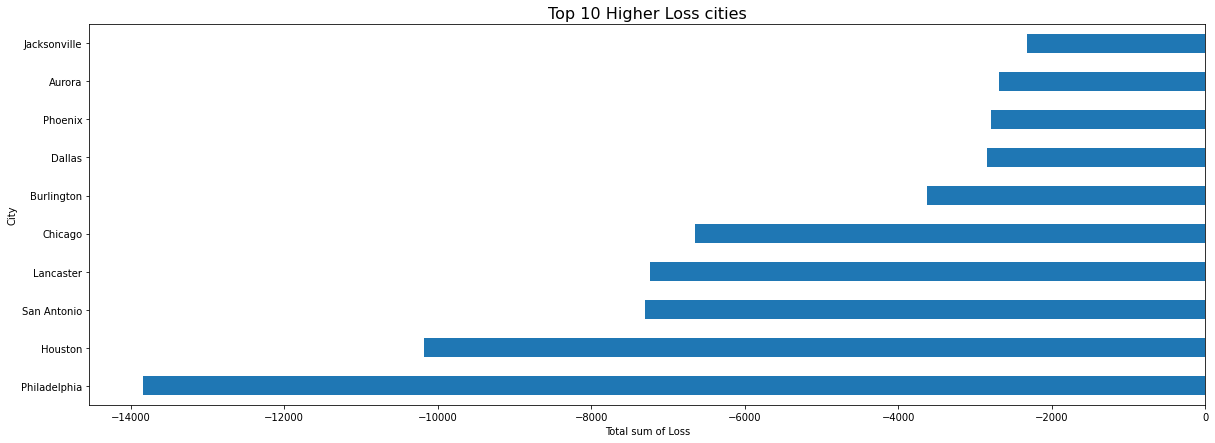

In [60]:
plt.title("Top 10 Higher Loss cities",fontsize=16)
plt.xlabel('Total sum of Loss')
df.groupby('City')['Profit'].sum().sort_values()[:10].plot(kind='barh',figsize=(20,7));

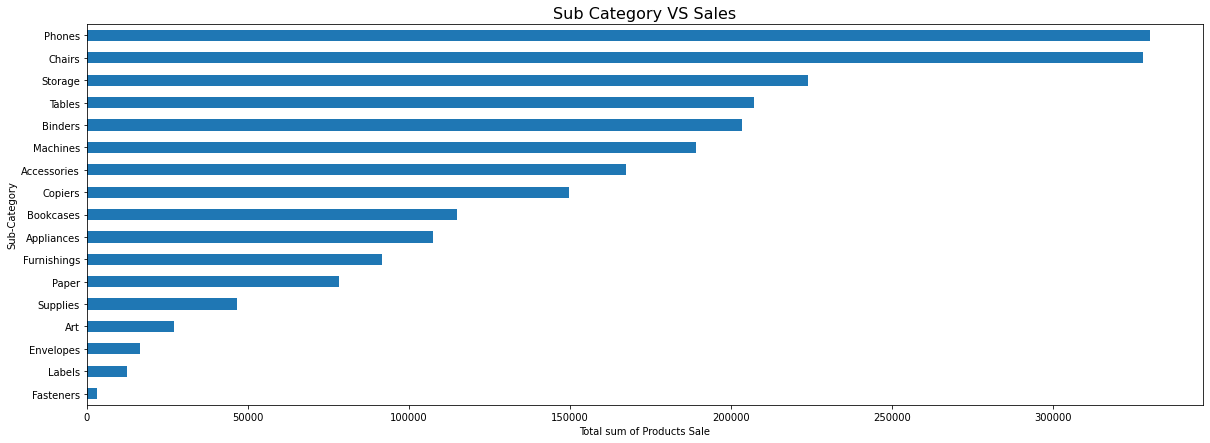

In [105]:
plt.title("Sub Category VS Sales",fontsize=16)
plt.xlabel('Total sum of Products Sale')
df.groupby('Sub-Category')['Sales'].sum().sort_values().plot(kind='barh',figsize=(20,7));

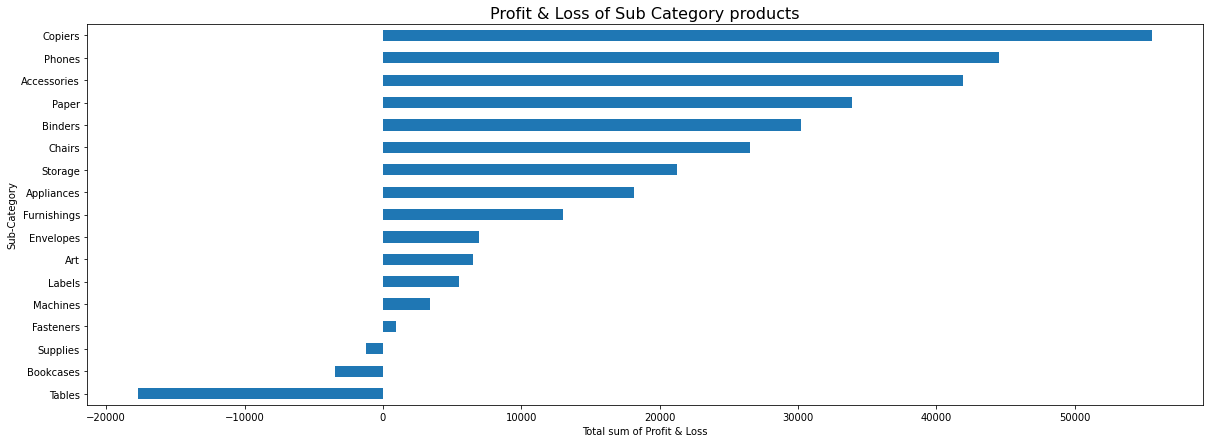

In [102]:
plt.title("Profit & Loss of Sub Category products",fontsize=16)
plt.xlabel('Total sum of Profit & Loss')
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh',figsize=(20,7));

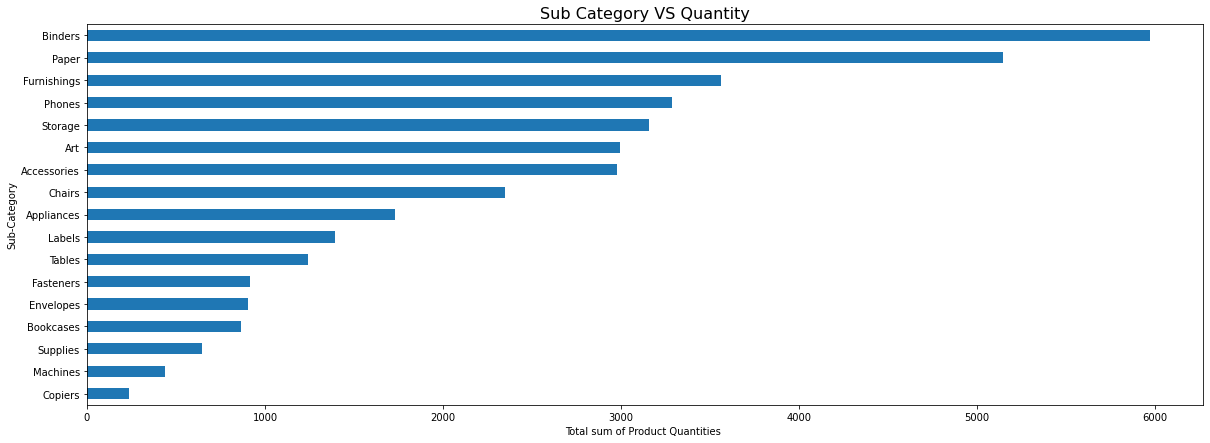

In [90]:
plt.title("Sub Category VS Quantity",fontsize=16)
plt.xlabel('Total sum of Product Quantities ')
df.groupby('Sub-Category')['Quantity'].sum().sort_values().plot(kind='barh',figsize=(20,7));

# Multi-Variate Analysis

<AxesSubplot:xlabel='State'>

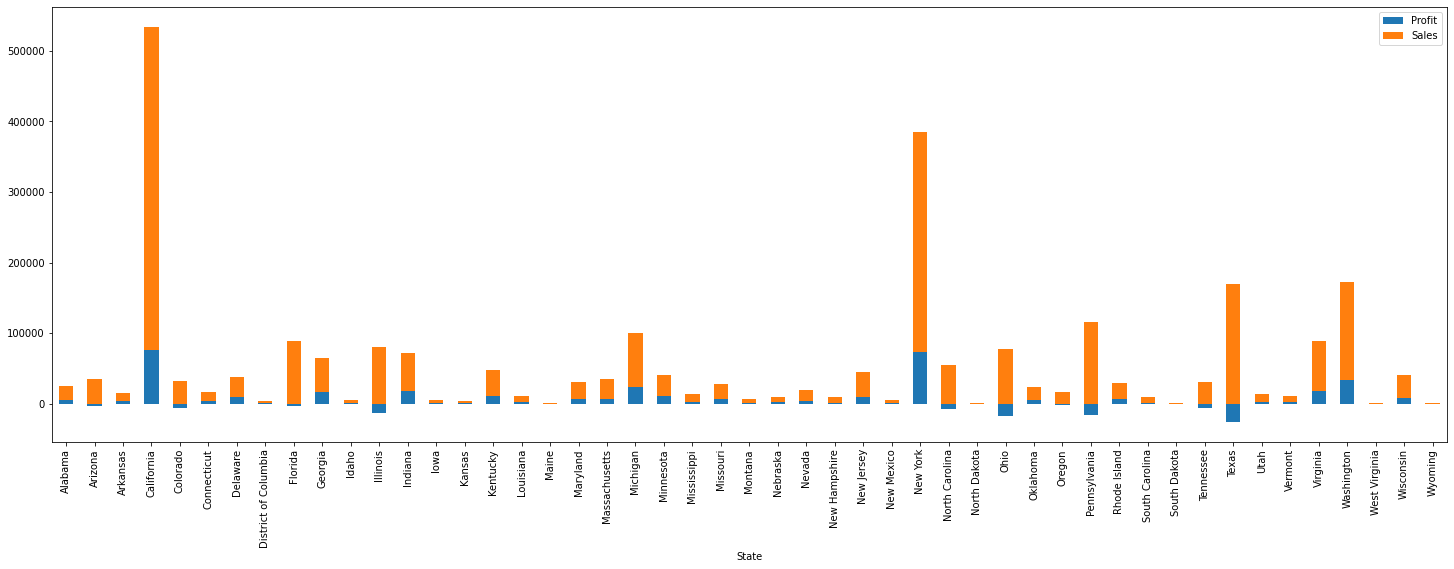

In [83]:

df.groupby('State')['Profit','Sales'].sum().plot(kind='bar',figsize=(25,8),stacked=True)

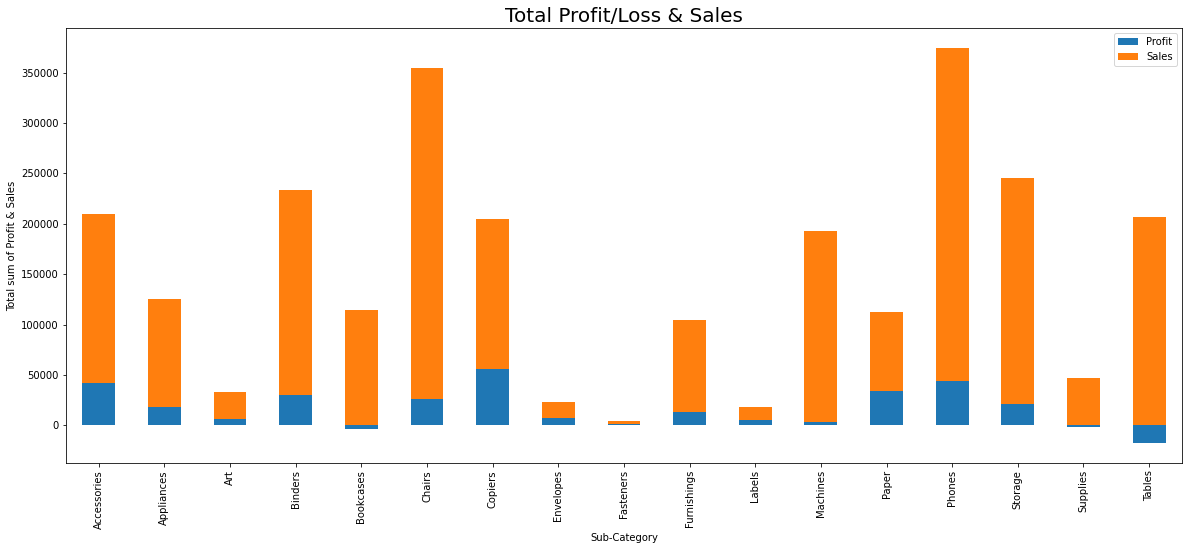

In [107]:
df.groupby(['Sub-Category'])['Profit','Sales'].sum().plot(kind='bar',figsize=(20,8),stacked=True)
plt.ylabel('Total sum of Profit & Sales');
plt.title("Total Profit/Loss & Sales",fontsize=20);

# 

# Statistics Analysis

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


In [132]:
df.describe(include='object').T

,count,unique,top,freq
Ship Mode,9977,4,Standard Class,5955
Segment,9977,3,Consumer,5183
Country,9977,1,United States,9977
City,9977,531,New York City,914
State,9977,49,California,1996
Region,9977,4,West,3193
Category,9977,3,Office Supplies,6012
Sub-Category,9977,17,Binders,1522


# Correlation between Numerical Columns

<AxesSubplot:>

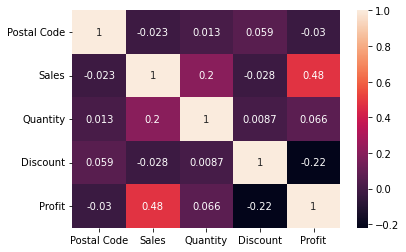

In [137]:
sns.heatmap(df.corr(),annot=True)

# Check Outliers in each numerical column with Region

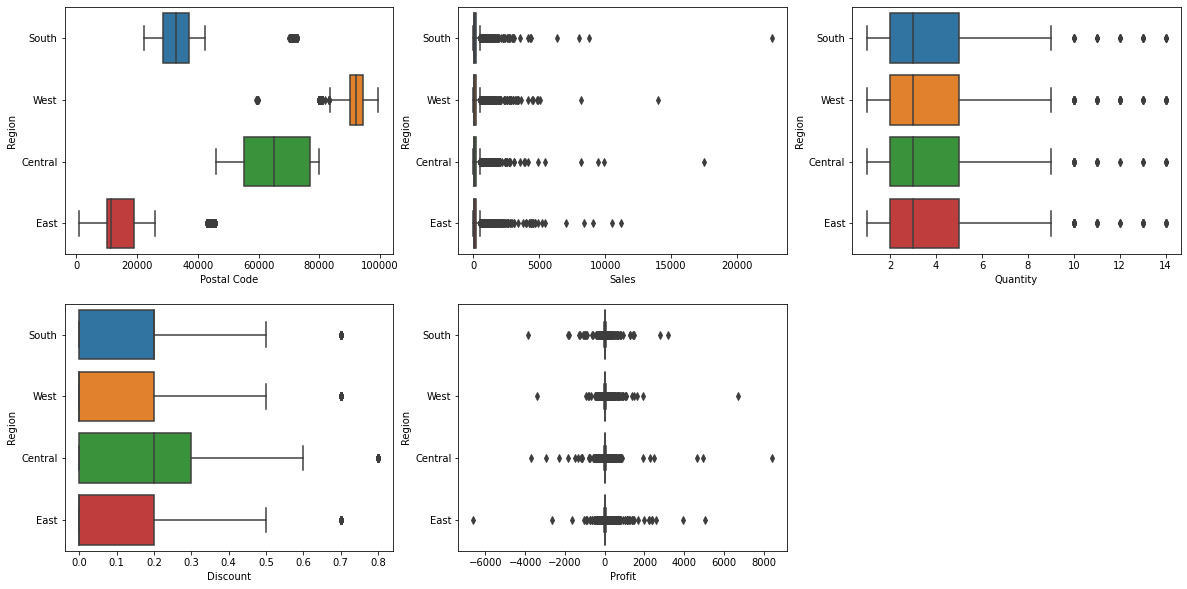

In [146]:
plot=1
plt.figure(figsize=(20,10))
for col in df.columns:
    if df[col].dtypes != 'object':
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],df['Region'])
        plot+=1